In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preparation of the Time Prediction Analysis Data
Die vorliegenden Daten eignen sich so noch nicht für eine Analyse, es müssen noch einige Vorverarbeitungsschritte durchgeführt werden:
- Datumsformat angleichen
- Spaltenbezichnungen der genutzen Spalten angleichen
- Datensätze zu einem Dataframe zusammenfügen
- für stündliche Analyse Werte ohne Uhrzeit löschen
- Daten zusammenfassen zu 
    - Anrufen/Stunde -> df_hourly
    - Anrufen/Tag -> df_daily
- Duplikate anhand des hashes entfernen

In [220]:
# Load Timestamp of Dataset
path = "C:/Users/ChiaraVogt/Desktop/Masterarbeit/DatenLigue180/"
d2014 = pd.read_csv(path + "ligue180-2014.csv", encoding='utf-8-sig', delimiter=';', usecols=['data_atendimento'])
d2015 = pd.read_csv(path + "ligue180-2015.csv", encoding='utf-8-sig', delimiter=';', usecols=['data_atendimento'])
d2016 = pd.read_csv(path + "ligue180-2016.csv", encoding='utf-8-sig', delimiter=';', usecols=['data_atendimento'])
d2017 = pd.read_csv(path + "ligue180-2017.csv", encoding='utf-8-sig', delimiter=';', usecols=['data_atendimento'])
d2018 = pd.read_csv(path + "ligue180-2018.csv", encoding='utf-8-sig', delimiter=';', usecols=['data_atendimento'])
d2018_2 = pd.read_csv(path + "ligue180-nov-2018.csv", encoding='utf-8-sig', delimiter=';', usecols=['data_atendimento'])
d2019 = pd.read_csv(path + "ligue180-2019.csv", encoding='utf-8-sig', delimiter=';', usecols=['data_atendimento'])
d2020 = pd.read_csv(path + "ligue180-primeiro-semestre-2020.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data_da_denúncia'])
d2020_2 = pd.read_csv(path + "ligue180-segundo-semestre-2020.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data de cadastro'])
d2021 = pd.read_csv(path + "ligue180-primeiro-semestre-2021.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data de cadastro'])
d2021_2 = pd.read_csv(path + "ligue180-segundo-semestre-2021.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data de cadastro'])
d2022 = pd.read_csv(path + "ligue180-primeiro-semestre-2022.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data de cadastro'])
d2022_2 = pd.read_csv(path + "ligue180-segundo-semestre-2022.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data_de_cadastro'])
d2023 = pd.read_csv(path + "ligue180-primeiro-semestre-2023.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data_de_cadastro'])
d2023_2 = pd.read_csv(path + "ligue180-segundo-semestre-2023.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data_de_cadastro'])

# Timestamp angleichen
d2014['data_atendimento'] = pd.to_datetime(d2014['data_atendimento'], dayfirst = True)
d2015['data_atendimento'] = pd.to_datetime(d2015['data_atendimento'])
d2016['data_atendimento'] = pd.to_datetime(d2016['data_atendimento'], dayfirst = True)
d2017['data_atendimento'] = pd.to_datetime(d2017['data_atendimento'])
d2018['data_atendimento'] = pd.to_datetime(d2018['data_atendimento'])
d2018_2['data_atendimento'] = pd.to_datetime(d2018_2['data_atendimento'])
d2019['data_atendimento'] = pd.to_datetime(d2019['data_atendimento'])
d2020['Data_da_denúncia'] = pd.to_datetime(d2020['Data_da_denúncia'], dayfirst = True)
d2020_2['Data de cadastro'] = pd.to_datetime(d2020_2['Data de cadastro'], dayfirst = True)
d2021['Data de cadastro'] = pd.to_datetime(d2021['Data de cadastro'], dayfirst = True)
d2021_2['Data de cadastro'] = pd.to_datetime(d2021_2['Data de cadastro'], dayfirst = True)
d2022['Data de cadastro'] = pd.to_datetime(d2022['Data de cadastro'], dayfirst = True)
d2022_2['Data_de_cadastro'] = pd.to_datetime(d2022_2['Data_de_cadastro'], dayfirst = True)
d2023['Data_de_cadastro'] = pd.to_datetime(d2023['Data_de_cadastro'], dayfirst = True)
d2023_2['Data_de_cadastro'] = pd.to_datetime(d2023_2['Data_de_cadastro'], dayfirst = True)

# Spaltennamen angleichen
d2014 = d2014.rename(columns = {'data_atendimento' : 'date'})
d2015 = d2015.rename(columns = {'data_atendimento' : 'date'})
d2016 = d2016.rename(columns = {'data_atendimento' : 'date'})
d2017 = d2017.rename(columns = {'data_atendimento' : 'date'})
d2018 = d2018.rename(columns = {'data_atendimento' : 'date'})
d2018_2 = d2018_2.rename(columns = {'data_atendimento' : 'date'})
d2019 = d2019.rename(columns = {'data_atendimento' : 'date'})
d2020 = d2020.rename(columns = {'Data_da_denúncia' : 'date'})
d2020_2 = d2020_2.rename(columns = {'Data de cadastro' : 'date'})
d2021 = d2021.rename(columns = {'Data de cadastro' : 'date'})
d2021_2 = d2021_2.rename(columns = {'Data de cadastro' : 'date'})
d2022 = d2022.rename(columns = {'Data de cadastro' : 'date'})
d2022_2 = d2022_2.rename(columns = {'Data_de_cadastro' : 'date'})
d2023 = d2023.rename(columns = {'Data_de_cadastro' : 'date'})
d2023_2 = d2023_2.rename(columns = {'Data_de_cadastro' : 'date'})

# Zeitreihen zu Datensatz verbinden
data_call_all = pd.concat([d2014, d2015, d2016, d2017, d2018, d2018_2, d2019, d2020, d2020_2, d2021, d2021_2, d2022, d2022_2, d2023, d2023_2], ignore_index = True)
data_call_all.set_index('date', inplace=True)
data_call_all

Vermutlich gibt es einige Daten bei denen die Uhrzeit nicht festgehalten ist und alle Daten des Tages auf 00:00:00 datiert sind. Diese Werte sind für die Tagesanalyse hilfreich, verfälschen jedoch die Ergebnisse der Stunden. Deshalb werden für alle Berechnungen mit Stunden diese Werte herausgefiltert. 

In [225]:
# Filtern der Einträge, bei denen die Uhrzeit nicht 00:00:00 ist
data_call_all_hourly = data_call_all[data_call_all.index.time != pd.Timestamp('00:00:00').time()]

In [226]:
# Verarbeiten der Datensätze in calls/hour (df_hourly) und calls/day (df_daily)
df_hourly = data_call_all_hourly.resample('h').size().reset_index(name='calls')
df_hourly.set_index('date', inplace=True)
df_daily = data_call_all.resample('d').size().reset_index(name='calls')
df_daily.set_index('date', inplace=True)

C:\Users\ChiaraVogt\AppData\Local\Temp\ipykernel_7716\3048150541.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = data_call_all_hourly.resample('H').size().reset_index(name='calls')


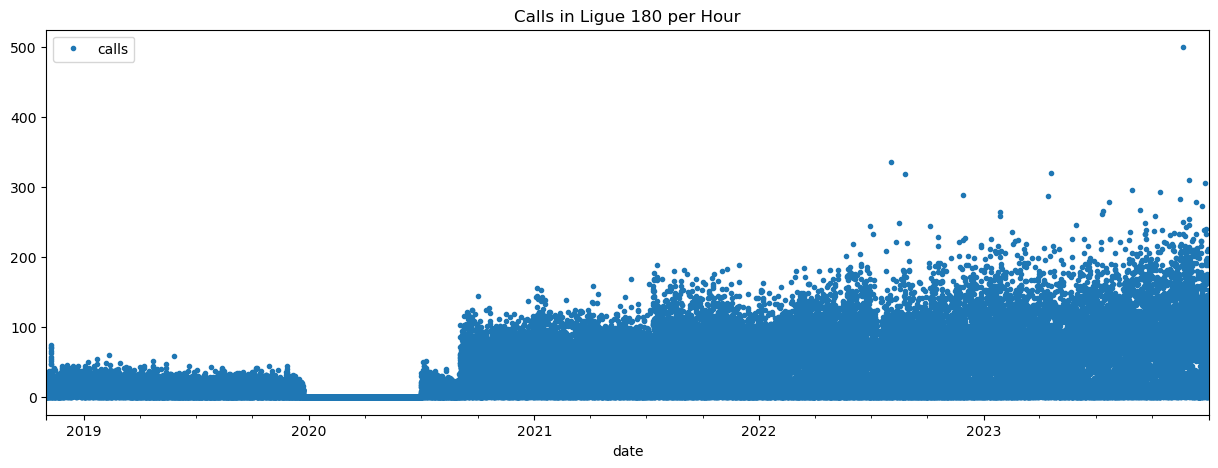

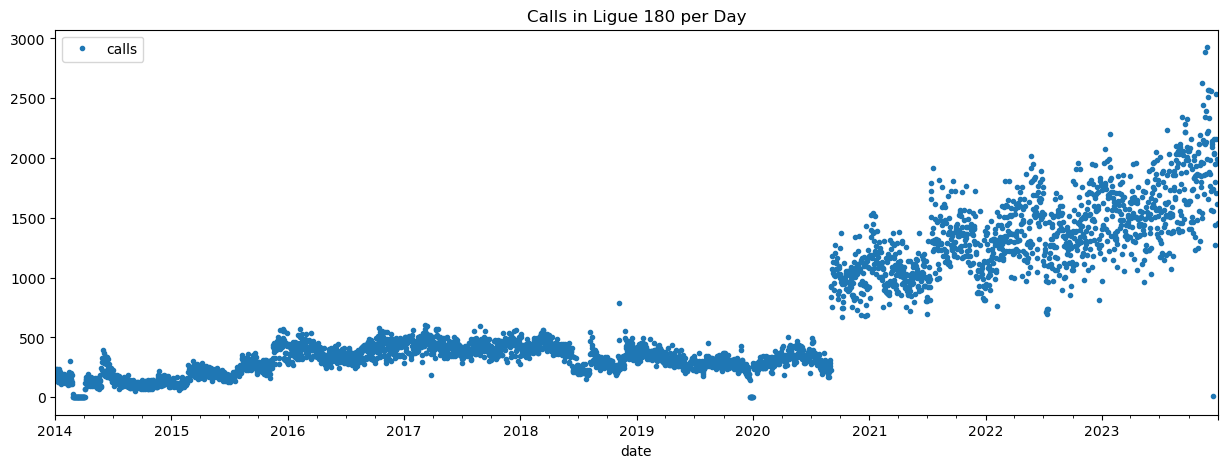

In [271]:
df_hourly.plot(style='.', figsize=(15,5), title='Calls in Ligue 180 per Hour')
plt.show()
df_daily.plot(style='.', figsize=(15,5), title='Calls in Ligue 180 per Day')
plt.show()

## Remove Duplicates
*hash*-Column existiert in Datensatz von 2020 bis 2023. Der gleiche *hash* existiert teilweise mehrmals:

In [230]:
# Load Timestamp of Dataset
path = "C:/Users/ChiaraVogt/Desktop/Masterarbeit/DatenLigue180/"
d2020 = pd.read_csv(path + "ligue180-primeiro-semestre-2020.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data_da_denúncia', 'hash_par_vitima_suspeito'])
d2020_2 = pd.read_csv(path + "ligue180-segundo-semestre-2020.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data de cadastro', 'hash'])
d2021 = pd.read_csv(path + "ligue180-primeiro-semestre-2021.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data de cadastro', 'hash'])
d2021_2 = pd.read_csv(path + "ligue180-segundo-semestre-2021.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data de cadastro', 'hash'])
d2022 = pd.read_csv(path + "ligue180-primeiro-semestre-2022.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data de cadastro', 'hash'])
d2022_2 = pd.read_csv(path + "ligue180-segundo-semestre-2022.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data_de_cadastro', 'hash'])
d2023 = pd.read_csv(path + "ligue180-primeiro-semestre-2023.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data_de_cadastro', 'hash'])
d2023_2 = pd.read_csv(path + "ligue180-segundo-semestre-2023.csv", encoding='utf-8-sig', delimiter=';', usecols=['Data_de_cadastro', 'hash'])

# Timestamp angleichen
d2020['Data_da_denúncia'] = pd.to_datetime(d2020['Data_da_denúncia'], dayfirst = True)
d2020_2['Data de cadastro'] = pd.to_datetime(d2020_2['Data de cadastro'], dayfirst = True)
d2021['Data de cadastro'] = pd.to_datetime(d2021['Data de cadastro'], dayfirst = True)
d2021_2['Data de cadastro'] = pd.to_datetime(d2021_2['Data de cadastro'], dayfirst = True)
d2022['Data de cadastro'] = pd.to_datetime(d2022['Data de cadastro'], dayfirst = True)
d2022_2['Data_de_cadastro'] = pd.to_datetime(d2022_2['Data_de_cadastro'], dayfirst = True)
d2023['Data_de_cadastro'] = pd.to_datetime(d2023['Data_de_cadastro'], dayfirst = True)
d2023_2['Data_de_cadastro'] = pd.to_datetime(d2023_2['Data_de_cadastro'], dayfirst = True)

# Spaltennamen angleichen
d2020 = d2020.rename(columns = {'Data_da_denúncia' : 'date', 'hash_par_vitima_suspeito' : 'hash'})
d2020_2 = d2020_2.rename(columns = {'Data de cadastro' : 'date'})
d2021 = d2021.rename(columns = {'Data de cadastro' : 'date'})
d2021_2 = d2021_2.rename(columns = {'Data de cadastro' : 'date'})
d2022 = d2022.rename(columns = {'Data de cadastro' : 'date'})
d2022_2 = d2022_2.rename(columns = {'Data_de_cadastro' : 'date'})
d2023 = d2023.rename(columns = {'Data_de_cadastro' : 'date'})
d2023_2 = d2023_2.rename(columns = {'Data_de_cadastro' : 'date'})

# Zeitreihen zu Datensatz verbinden
data_call_hash_all = pd.concat([d2020, d2020_2, d2021, d2021_2, d2022, d2022_2, d2023, d2023_2], ignore_index = True)
data_call_hash_all['date'] = pd.to_datetime(data_call_hash_all['date'], dayfirst = True,format='%Y-%m-%d %H:%M:%S')
data_call_hash_all['date'] = data_call_hash_all['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
data_call_hash_all

Wie hier schon zu sehen gibt es viele Daten bei denen im Zeitstempel keine Uhrzeit angegeben ist, wegen denen alle Daten des Tages auf 00:00:00 datiert sind. Diese Werte sind für die Tagesanalyse hilfreich, verfälschen jedoch die Ergebnisse der Stunden. Deshalb werden für alle Berechnungen mit Stunden diese Werte herausgefiltert. 

In [235]:
data_call_hash_all['date'] = pd.to_datetime(data_call_hash_all['date'], errors='coerce')
data_call_hash_all.set_index('date', inplace=True)

In [236]:
print(f"Beispiel für Zeitstempel im Index: {data_call_hash_all.index[:5]}")
# Einträge filtern, bei denen die Uhrzeit nicht 00:00:00 ist
data_call_hash_all_hourly = data_call_hash_all[data_call_hash_all.index.time != pd.Timestamp('00:00:00').time()]
data_call_hash_all_hourly.head()

Beispiel für Zeitstempel im Index: DatetimeIndex(['2020-04-09', '2020-02-15', '2020-06-14', '2020-03-24',
               '2020-05-31'],
              dtype='datetime64[ns]', name='date', freq=None)


,hash
date,
2020-07-02 14:18:00,35666ce2a5a539bdb67ab4c0bbc94eff
2020-07-03 20:14:00,38e27ee59745df105461fa4818053355
2020-07-15 19:31:00,30984674c4c0dac02e2ebcd456d41e0c
2020-07-15 14:21:00,4ad777b83c76090c8f2a0caf9e382e00
2020-07-07 17:41:00,3d1f0b2bb714da65b50b6849c61ea487


Im Folgenden werden die mehrmals vorkommenden Hashtags analysiert. Es wird vermutet, dass diese den gleichen Anruf und die gleiche Anzeige betreffen.

In [237]:
hash_counts = data_call_hash_all['hash'].value_counts()
# Dataframe hash_counts soll nur bei mind. 2 value_counts() den hash und die Menge an Vorkomnissen speichern
hash_counts = hash_counts[hash_counts >= 2]
print(hash_counts.head(10))

hash
d2d9664e8a2fb21d0a441753b3532b3a                                    69
AC15EA832A6206870051921C7657119DEB34DD7E24C672D7B0C7514F9E371EC3    62
8A3F1EB84C2612D48ABB28418FF2E81BFD81C8125318C178BA02D7B39182BF2A    62
48CEE01DD6E73A76286D0C5C96E29071668CEBEAFEE5C39D3D49B1B617433D6E    62
F14E6B290167E66FCC0469A51267A0F2F3591FE837F72104D6C9A318A2D16253    62
044FBDC51CCA0AAF96D8D0C738795350DAC073D84564C1ACBE835888E27F8D6E    62
51408d8b591d665bddf34d5aaef59bff                                    50
D7C484B367258B0DD6214ACBAEDB48647B9A0B54307BF72303B9F112CB714AFA    45
674F57F8EBDE018B3255A2565EB332465F5DAE31A6C0FD3695DA91D778844F39    45
f8c2fac27add47c5d7b4a4a46a330c37                                    39
Name: count, dtype: int64


In [238]:
# Summe aller hash die doppelt oder mehr vorkommen
sum_duplicate_entries = hash_counts.sum()
# Gesamtanteil an den Einträgen in data_call_all
total_entries = len(data_call_hash_all)
# Prozentsatz der Einträge, die doppelt oder mehr vorkommen
percent_duplicate_entries = (sum_duplicate_entries / total_entries) * 100
# ab 2014
percent_duplicate_entries_2014 = (sum_duplicate_entries / len(data_call_all)) * 100
# Berechne die Anzahl der einzigartigen Hashes (einen Eintrag pro Hash)
unique_hash_entries = len(data_call_hash_all) - hash_counts.sum() + len(hash_counts)
# Prozentsatz der Einträge, wenn man nur einen Eintrag pro Hash hätte
percent_unique_hash_entries = (unique_hash_entries / total_entries) * 100
# ab 2014
percent_unique_hash_entries_2014 = (unique_hash_entries + (len(data_call_all) - len(data_call_hash_all))) / len(data_call_all) * 100
# Ergebnisse anzeigen
print(f"Summe der Einträge, die doppelt oder mehr vorkommen: {sum_duplicate_entries}")
print(f"Menge aller Einträge (2020-2023): {len(data_call_hash_all)}")
print(f"Anzahl der hash, die nicht mehrfach vorkommen: {len(data_call_hash_all)-sum_duplicate_entries}")
print(f"Prozentualer Anteil der doppelten Einträge am Gesamtdatensatz (2020-2023): {percent_duplicate_entries:.2f}%")
print(f"Prozentualer Anteil der doppelten Einträge am Gesamtdatensatz (2014-2023): {percent_duplicate_entries_2014:.2f}%")
print(f"Anzahl der einzigartigen Hashes (jeweils ein Eintrag): {unique_hash_entries}")
print(f"Prozentualer Anteil des Menge der Einträge (2020-2023) bei Entfernen der Duplikate: {percent_unique_hash_entries:.2f}%")
print(f"Prozentualer Anteil des Menge der Einträge (2014-2023) bei Entfernen der Duplikate: {percent_unique_hash_entries_2014:.2f}%")

Summe der Einträge, die doppelt oder mehr vorkommen: 1649615
Menge aller Einträge (2020-2023): 1739566
Anzahl der hash, die nicht mehrfach vorkommen: 89951
Prozentualer Anteil der doppelten Einträge am Gesamtdatensatz (2020-2023): 94.83%
Prozentualer Anteil der doppelten Einträge am Gesamtdatensatz (2014-2023): 68.56%
Anzahl der einzigartigen Hashes (jeweils ein Eintrag): 402876
Prozentualer Anteil des Menge der Einträge (2020-2023) bei Entfernen der Duplikate: 23.16%
Prozentualer Anteil des Menge der Einträge (2014-2023) bei Entfernen der Duplikate: 44.45%


Es sind sehr viele hashs die sehr häufig vorkommen. Ein erster Blick in die Daten lässt vermuten, dass es sich um die gleiche Anzeige oder um die gleichen Personen  handelt, da auch die Zeit die gleiche ist. Im folgenden werden die hashs im Gesamtdatensatz stichprobenartig untersucht.  

In [239]:
# Import aller Daten, um zu prüfen, ob der gleiche Hashtag die gleiche Anzeige sein könnte
data_all_2020 = pd.read_csv("data_all_2020.csv")

C:\Users\ChiaraVogt\AppData\Local\Temp\ipykernel_7716\2856916606.py:2: DtypeWarning: Columns (4,8,20,21,33,35,36,37,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  data_all_2020 = pd.read_csv("data_all_2020.csv")


In [240]:
# Erster Hash-Wert aus hash_counts
first_hash = hash_counts.index[50]
print(f"Hash: {first_hash}")

# Alle Zeilen in data_all_2020 mit diesem Hash-Wert
matching_rows = data_all_2020[data_all_2020['hash'] == first_hash]

# Erste gefundene Zeile mit allen Variablen
first_match = matching_rows.iloc[0]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print("\nErster Treffer mit allen Variablen:")
        print(first_match)

# Überprüfen, ob alle anderen Spalten für diesen Hash identische Werte haben
# Zeilen vergleichen
differences = matching_rows.drop(columns=['hash']).nunique()

# Unterschiede ausgeben (Spalten, in denen unterschiedliche Werte vorkommen)
differing_columns = differences[differences > 1]

if differing_columns.empty:
    print("\nAlle Zeilen mit dem Hash haben identische Werte in allen anderen Spalten.")
else:
    print("\nUnterschiede gefunden in folgenden Spalten:")
    for col in differing_columns.index:
        unique_values = matching_rows[col].unique()
        print(f"Spalte '{col}': Unterschiedliche Werte = {unique_values}")


Hash: 71DB245DE515B4D294F6F2D9217ACD86C5AE5B7ADB4BF37396459EC6B928D089

Erster Treffer mit allen Variablen:
Unnamed: 0                                                                                  1542360
hash                                              71DB245DE515B4D294F6F2D9217ACD86C5AE5B7ADB4BF3...
Data_de_cadastro                                                            2023-10-25 16:36:13.823
Denunciante                                                                        A PRÓPRIA VÍTIMA
relacao_demandante_vitima                                                                       NaN
Canal_de_atendimento                                                                     TELEFÔNICO
País_da_vítima                                                                          BR | BRASIL
UF                                                                   DENUNCIANTE NÃO SOUBE INFORMAR
Estado                                                                                      

In [241]:
hash_table = matching_rows.copy()
hash_table

,Unnamed: 0,hash,Data_de_cadastro,Denunciante,relacao_demandante_vitima,Canal_de_atendimento,País_da_vítima,UF,Estado,Município,...,Suspeito_preso,UF_do_suspeito,sl_suspeito_municipio,Profissão_do_suspeito,Grau_de_instrução_do_suspeito,Religião_do_suspeito,Vínculo_Órgão_PJ_do_suspeito,sl_suspeito_ramo,suspeito_especificacao_etnia,vitima_especificacao_etnia
1542360,1542360,71DB245DE515B4D294F6F2D9217ACD86C5AE5B7ADB4BF3...,2023-10-25 16:36:13.823,A PRÓPRIA VÍTIMA,NaN,TELEFÔNICO,BR | BRASIL,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,DENUNCIANTE NÃO SOUBE INFORMAR,...,NaN,DENUNCIANTE NÃO SOUBE INFORMAR,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,NaN,NaN,NaN,PODER EXECUTIVO EM GERAL ? FEDERAL,NaN,NaN
1542375,1542375,71DB245DE515B4D294F6F2D9217ACD86C5AE5B7ADB4BF3...,2023-10-25 16:36:13.823,A PRÓPRIA VÍTIMA,NaN,TELEFÔNICO,BR | BRASIL,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,DENUNCIANTE NÃO SOUBE INFORMAR,...,NaN,DENUNCIANTE NÃO SOUBE INFORMAR,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,NaN,NaN,NaN,OUTRAS ATIVIDADES DE SERVIÇOS,NaN,NaN
1542376,1542376,71DB245DE515B4D294F6F2D9217ACD86C5AE5B7ADB4BF3...,2023-10-25 16:36:13.823,A PRÓPRIA VÍTIMA,NaN,TELEFÔNICO,BR | BRASIL,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,DENUNCIANTE NÃO SOUBE INFORMAR,...,NaN,DENUNCIANTE NÃO SOUBE INFORMAR,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,NaN,NaN,NaN,OUTRAS ATIVIDADES DE SERVIÇOS,NaN,NaN
1549150,1549150,71DB245DE515B4D294F6F2D9217ACD86C5AE5B7ADB4BF3...,2023-10-25 16:36:13.823,A PRÓPRIA VÍTIMA,NaN,TELEFÔNICO,BR | BRASIL,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,DENUNCIANTE NÃO SOUBE INFORMAR,...,NaN,DENUNCIANTE NÃO SOUBE INFORMAR,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,NaN,NaN,NaN,PODER EXECUTIVO EM GERAL ? FEDERAL,NaN,NaN
1549155,1549155,71DB245DE515B4D294F6F2D9217ACD86C5AE5B7ADB4BF3...,2023-10-25 16:36:13.823,A PRÓPRIA VÍTIMA,NaN,TELEFÔNICO,BR | BRASIL,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,DENUNCIANTE NÃO SOUBE INFORMAR,...,NaN,DENUNCIANTE NÃO SOUBE INFORMAR,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,NaN,NaN,NaN,OUTRAS ATIVIDADES DE SERVIÇOS,NaN,NaN
1551648,1551648,71DB245DE515B4D294F6F2D9217ACD86C5AE5B7ADB4BF3...,2023-10-25 16:36:13.823,A PRÓPRIA VÍTIMA,NaN,TELEFÔNICO,BR | BRASIL,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,DENUNCIANTE NÃO SOUBE INFORMAR,...,NaN,DENUNCIANTE NÃO SOUBE INFORMAR,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,NaN,NaN,NaN,PODER EXECUTIVO EM GERAL ? FEDERAL,NaN,NaN
1551649,1551649,71DB245DE515B4D294F6F2D9217ACD86C5AE5B7ADB4BF3...,2023-10-25 16:36:13.823,A PRÓPRIA VÍTIMA,NaN,TELEFÔNICO,BR | BRASIL,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,DENUNCIANTE NÃO SOUBE INFORMAR,...,NaN,DENUNCIANTE NÃO SOUBE INFORMAR,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,NaN,NaN,NaN,PODER EXECUTIVO EM GERAL ? FEDERAL,NaN,NaN
1556899,1556899,71DB245DE515B4D294F6F2D9217ACD86C5AE5B7ADB4BF3...,2023-10-25 16:36:13.823,A PRÓPRIA VÍTIMA,NaN,TELEFÔNICO,BR | BRASIL,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,DENUNCIANTE NÃO SOUBE INFORMAR,...,NaN,DENUNCIANTE NÃO SOUBE INFORMAR,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,NaN,NaN,NaN,PODER EXECUTIVO EM GERAL ? FEDERAL,NaN,NaN
1556900,1556900,71DB245DE515B4D294F6F2D9217ACD86C5AE5B7ADB4BF3...,2023-10-25 16:36:13.823,A PRÓPRIA VÍTIMA,NaN,TELEFÔNICO,BR | BRASIL,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,DENUNCIANTE NÃO SOUBE INFORMAR,...,NaN,DENUNCIANTE NÃO SOUBE INFORMAR,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,NaN,NaN,NaN,OUTRAS ATIVIDADES DE SERVIÇOS,NaN,NaN
1556929,1556929,71DB245DE515B4D294F6F2D9217ACD86C5AE5B7ADB4BF3...,2023-10-25 16:36:13.823,A PRÓPRIA VÍTIMA,NaN,TELEFÔNICO,BR | BRASIL,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,DENUNCIANTE NÃO SOUBE INFORMAR,...,NaN,DENUNCIANTE NÃO SOUBE INFORMAR,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,NaN,NaN,NaN,OUTRAS ATIVIDADES DE SERVIÇOS,NaN,NaN


hash[0]: d2d9664e8a2fb21d0a441753b3532b3a  
Unterschiede in  
- violacao: 'INTEGRIDADE>PATRIMONIAL>INDIVIDUAL' 
    - 'INTEGRIDADE>FÍSICA>MAUS TRATOS'
    - 'INTEGRIDADE>PSÍQUICA>AMEAÇA ou COAÇÃO'
    - 'INTEGRIDADE>PSÍQUICA>CONSTRANGIMENTO'
- Motivacao:
    - viele verschiedene Anschuldigungen
- Profissão_do_suspeito:
    - CONSELHEIRO TUTELAR
    -> dadurch, dass dieser Wert immer der gleiche ist, lässt es darauf schließen, dass es sich um einen Menschen oder eine "Arbeitsgemeinschaft" handelt, der/die in mehreren Aspekten ihr Amt missbraucht hat/haben

Auch bei hash[1]: AC15EA832A6206870051921C7657119DEB34DD7E24C672D7B0C7514F9E371EC3  
zeigt sich dass das Arbeitsfeld des Beschuldigten immer das gleiche ist: PODER EXECUTIVO EM GERAL - MUNICIPAL
auch hier ist der Zeitstempel der gleiche. 
Hier gibt es viele Unterschiede in der Spalte violacao, jedoch sind es Straftaten, die "zusammenpassen", wie z.B.  
- 'LIBERDADE>SEXUAL>FÍSICA>ESTUPRO' -> Vergewaltigung
- 'INTEGRIDADE>FÍSICA>MAUS TRATOS' -> physische Misshandlung
- 'LIBERDADE>SEXUAL>FÍSICA>ABUSO SEXUAL FÍSICO' -> physischer sexueller Übergriff
- 'LIBERDADE>DIREITOS INDIVIDUAIS>STALKING' -> Stalking
TODO
Bei hash[10]: CDBEF147F8BFD6E6D63535DE2B51465DD58C6E089A43BE30AD77AAF6C13C8081  
handelt es sich um eine andere Situation. Hier zeigt eine dritte Person, jemanden an, der/die sich zu verschiedenen Personen schlecht verhalten hat:  
Spalte 'Cenário_da_violação': Unterschiedliche Werte = ['CASA ONDE RESIDE A VÍTIMA E O SUSPEITO' 'OUTROS']  
Spalte 'Gênero_da_vítima': Unterschiedliche Werte = ['FEMININO' 'MASCULINO']  
Spalte 'Faixa_etária_da_vítima': Unterschiedliche Werte = [**'25 A 29 ANOS' '06 ANOS' '12 ANOS' '05 ANOS'**]  
Spalte 'Raça_Cor_da_vítima': Unterschiedliche Werte = ['PARDA' 'PRETA']  
Spalte 'Relação_vítima_suspeito': Unterschiedliche Werte = [**'COMPANHEIRO(A)' 'MÃE' 'VIZINHO(A)'**]  
Spalte 'violacao': Unterschiedliche Werte = ['INTEGRIDADE>FÍSICA>MAUS TRATOS' 'INTEGRIDADE>FÍSICA>TORTURA FÍSICA'  
 'INTEGRIDADE>FÍSICA>OUTROS' 'DIREITOS SOCIAIS>SAÚDE'  
 'INTEGRIDADE>FÍSICA>ABANDONO'  
 'INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE'  
 'INTEGRIDADE>PSÍQUICA>EXPOSIÇÃO'  
 'INTEGRIDADE>FÍSICA>AGRESSÃO ou VIAS DE FATO'  
 'INTEGRIDADE>PSÍQUICA>CONSTRANGIMENTO'  
 'INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA' 'INTEGRIDADE>NEGLIGÊNCIA'  
 'DIREITOS SOCIAIS>PROTEÇÃO À INFÂNCIA'  
 'INTEGRIDADE>PSÍQUICA>AMEAÇA ou COAÇÃO' 'DIREITOS SOCIAIS>SEGURANÇA']  
Spalte 'Motivação': Unterschiedliche Werte = [nan 'MOTIVAÇÃO.EM RAZÃO DA CONDIÇÃO SOCIAL' 'OUTRO(S) ELEMENTO(S)']  
Spalte 'Frequência': Unterschiedliche Werte = ['DIARIAMENTE' 'SEMANALMENTE']  
Spalte 'Início_das_violações': Unterschiedliche Werte = ['HÁ MAIS DE UM ANO' 'HÁ MAIS DE SEIS MESES']  
Spalte 'UF_da_vítima': Unterschiedliche Werte = ['BA' 'DENUNCIANTE NÃO SOUBE INFORMAR']  
Spalte 'Município_da_vítima': Unterschiedliche Werte = ['291360 | ILHÉUS' 'DENUNCIANTE NÃO SOUBE INFORMAR']  

In [243]:
if 'date' in data_call_hash_all.columns:
    data_call_hash_all.set_index('date', inplace=True)

# Hashes, die mehr als einmal vorkommen
duplicate_hashes = data_call_hash_all['hash'].value_counts()
duplicate_hashes = duplicate_hashes[duplicate_hashes > 1].index
# 3. Filtern der Zeilen, die doppelte Hashes enthalten
duplicate_rows = data_call_hash_all[data_call_hash_all['hash'].isin(duplicate_hashes)]
# Prüfen, ob alle Zeitstempel innerhalb der Gruppen gleich sind
different_timestamp_rows = duplicate_rows.groupby('hash').filter(
    lambda x: len(x.index.unique()) > 1  # Prüfen auf unterschiedliche Zeitstempel im Index
)
print(different_timestamp_rows)
data_call_hash_all.head(5)

Empty DataFrame
Columns: [hash]
Index: []


,hash
date,
2020-04-09,00010323A77B85F087CA8A1B2C112DE747F8457FDBDEB3...
2020-02-15,00032338AC54195FE631641D894A994D5BEFC2166CFC89...
2020-06-14,0004F2CC5E8DDEF13C25B02C425518DBCE2B26AA9F04EC...
2020-03-24,00058E648CE71A540BDFBA7DBEF39D514BDC0BBB987296...
2020-05-31,0007A93EDC68BD64CC5CE692E301D9B8683538A722A88B...


In [268]:
# Neuer Dataframe ohne Duplikate
data_call_nodupl = data_call_hash_all.drop_duplicates(subset='hash', keep='first')
print(data_call_nodupl.head(5))
# Überprüfen, ob Menge der Ergebnisse gleich berechneter Menge von Einträgen ist
print(f"\nErwartete Anzahl der einzigartigen Hashes (jeweils ein Eintrag): {unique_hash_entries}")
print(f"Tatsächliche Anzahl der einzigartigen Hashes (jeweils ein Eintrag): {len(data_call_nodupl)}")

                                                         hash
date                                                         
2020-04-09  00010323A77B85F087CA8A1B2C112DE747F8457FDBDEB3...
2020-02-15  00032338AC54195FE631641D894A994D5BEFC2166CFC89...
2020-06-14  0004F2CC5E8DDEF13C25B02C425518DBCE2B26AA9F04EC...
2020-03-24  00058E648CE71A540BDFBA7DBEF39D514BDC0BBB987296...
2020-05-31  0007A93EDC68BD64CC5CE692E301D9B8683538A722A88B...

Erwartete Anzahl der einzigartigen Hashes (jeweils ein Eintrag): 402876
Tatsächliche Anzahl der einzigartigen Hashes (jeweils ein Eintrag): 402876


In [265]:
# Duplikate für Stunden-Zeitreihe entfernen
data_call_nodupl_hourly = data_call_hash_all_hourly.drop_duplicates(subset='hash', keep='first')
data_call_nodupl_hourly.head(5)

,hash
date,
2020-07-02 14:18:00,35666ce2a5a539bdb67ab4c0bbc94eff
2020-07-03 20:14:00,38e27ee59745df105461fa4818053355
2020-07-15 19:31:00,30984674c4c0dac02e2ebcd456d41e0c
2020-07-15 14:21:00,4ad777b83c76090c8f2a0caf9e382e00
2020-07-07 17:41:00,3d1f0b2bb714da65b50b6849c61ea487


C:\Users\ChiaraVogt\AppData\Local\Temp\ipykernel_7716\249484604.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly_nodupl_2020 = data_call_nodupl_hourly.resample('H').size().reset_index(name='calls')
C:\Users\ChiaraVogt\AppData\Local\Temp\ipykernel_7716\249484604.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly_2020 = data_call_hash_all_hourly.resample('H').size().reset_index(name='calls')


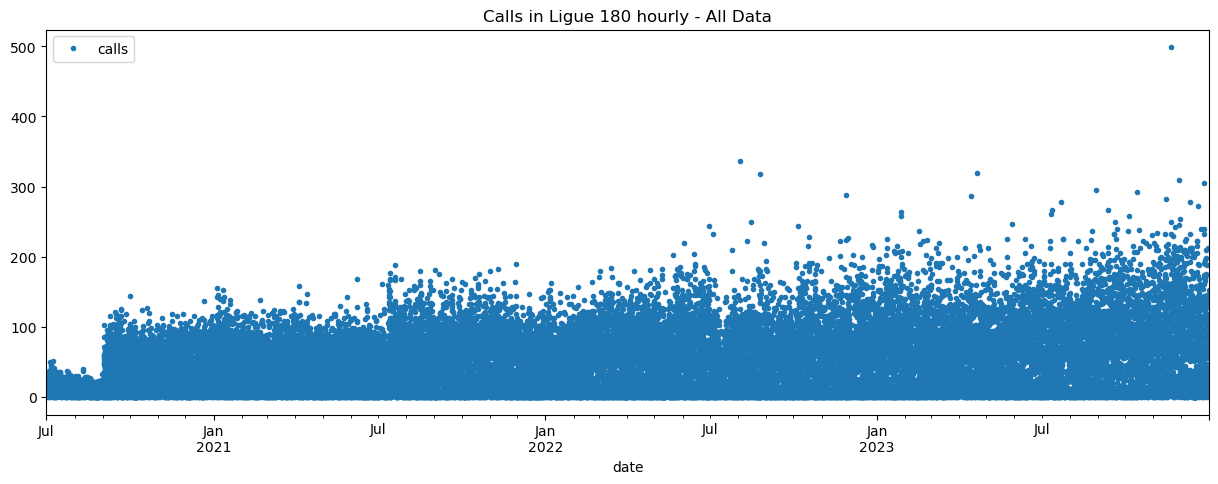

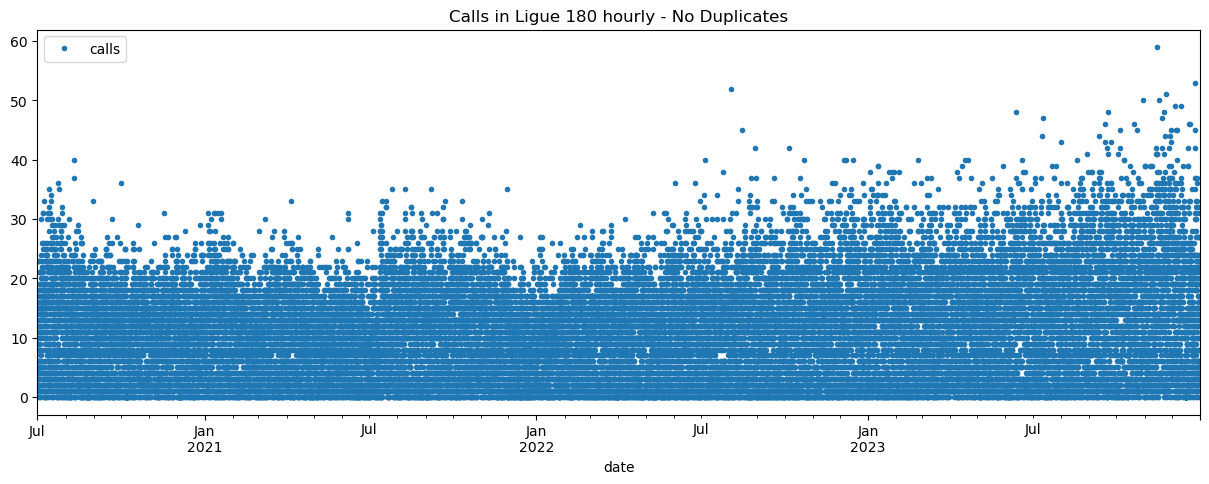

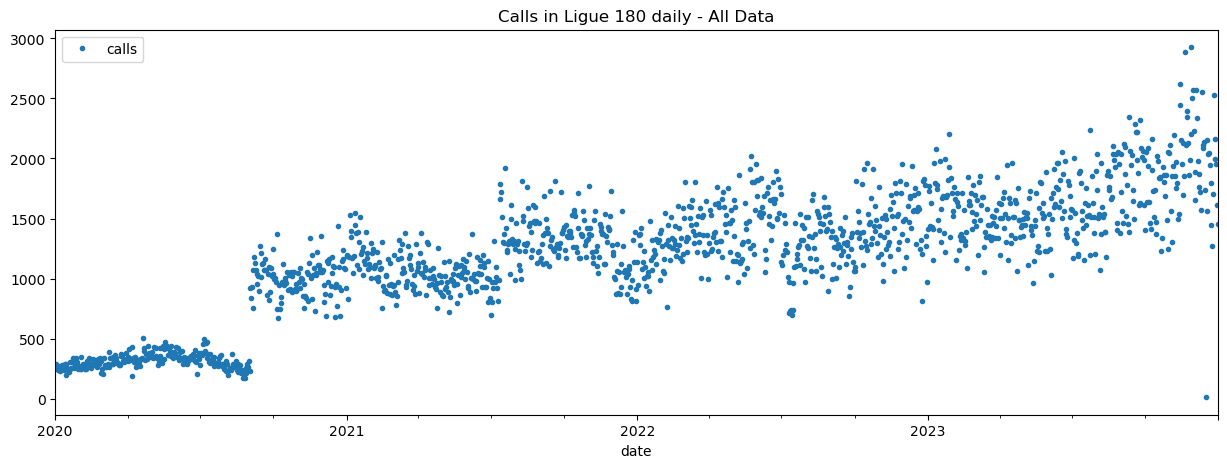

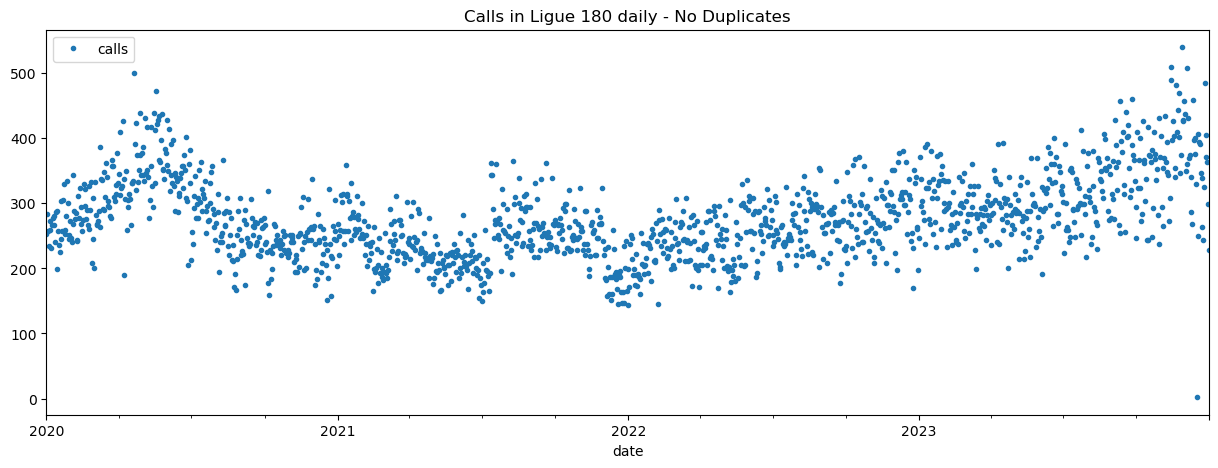

In [264]:
# Erstellen des Dataframes für Time Series Prediction - Ohne Duplikate - 2020 - 2023
df_hourly_nodupl_2020 = data_call_nodupl_hourly.resample('H').size().reset_index(name='calls')
df_hourly_nodupl_2020.set_index('date', inplace=True)
df_daily_nodupl_2020 = data_call_nodupl.resample('D').size().reset_index(name='calls')
df_daily_nodupl_2020.set_index('date', inplace=True)
# Erstellen des Dataframes für Time Series Prediction - Alle Daten - 2020 - 2023
df_hourly_2020 = data_call_hash_all_hourly.resample('H').size().reset_index(name='calls')
df_hourly_2020.set_index('date', inplace=True)
df_daily_2020 = data_call_hash_all.resample('D').size().reset_index(name='calls')
df_daily_2020.set_index('date', inplace=True)
df_hourly_2020.plot(style='.', figsize=(15,5), title='Calls in Ligue 180 hourly - All Data')
plt.show()
df_hourly_nodupl_2020.plot(style='.', figsize=(15,5), title='Calls in Ligue 180 hourly - No Duplicates')
plt.show()
df_daily_2020.plot(style='.', figsize=(15,5), title='Calls in Ligue 180 daily - All Data')
plt.show()
df_daily_nodupl_2020.plot(style='.', figsize=(15,5), title='Calls in Ligue 180 daily - No Duplicates')
plt.show()

Gerade im daily-Format zeigt sich, dass die Daten so viel mehr Konsistenz zu den vorherigen Daten haben, weswegen die weiter Verarbeitung ohne die Duplikate stattfinden wird. 

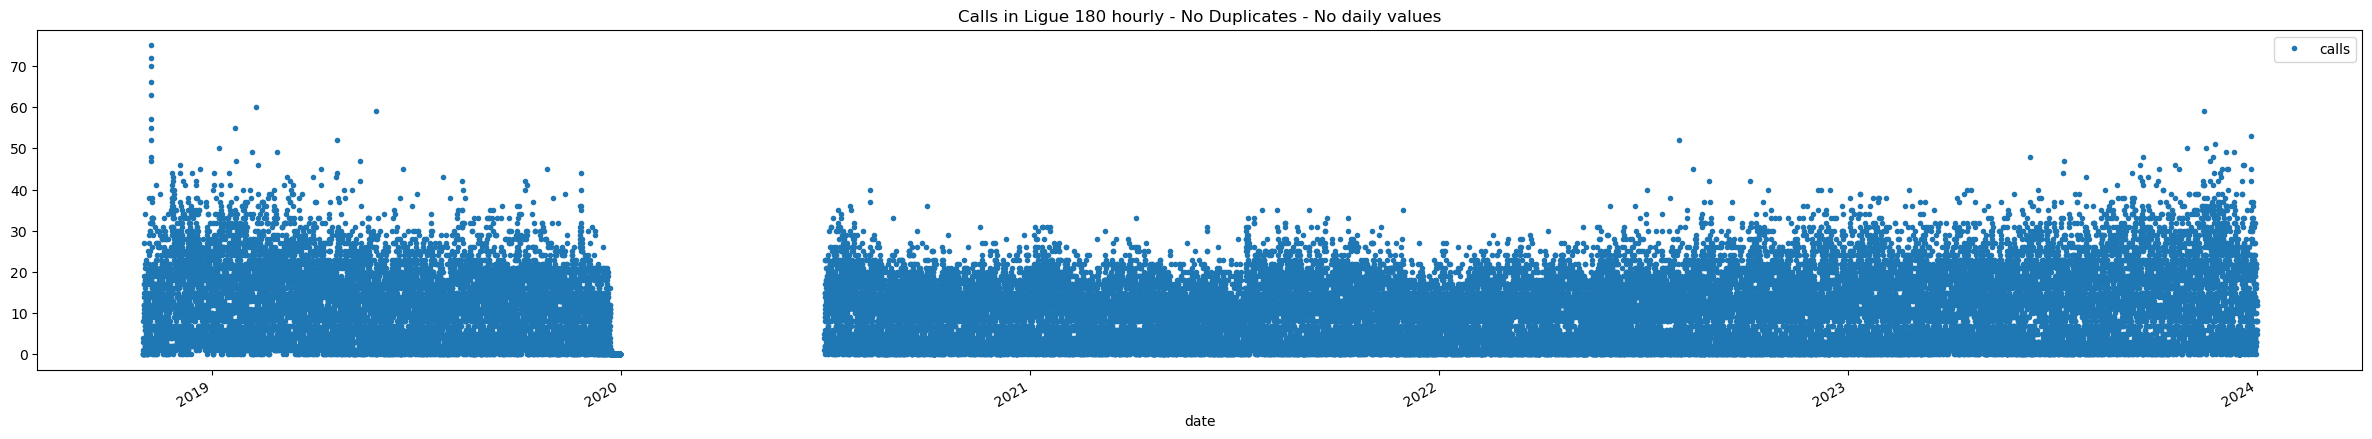

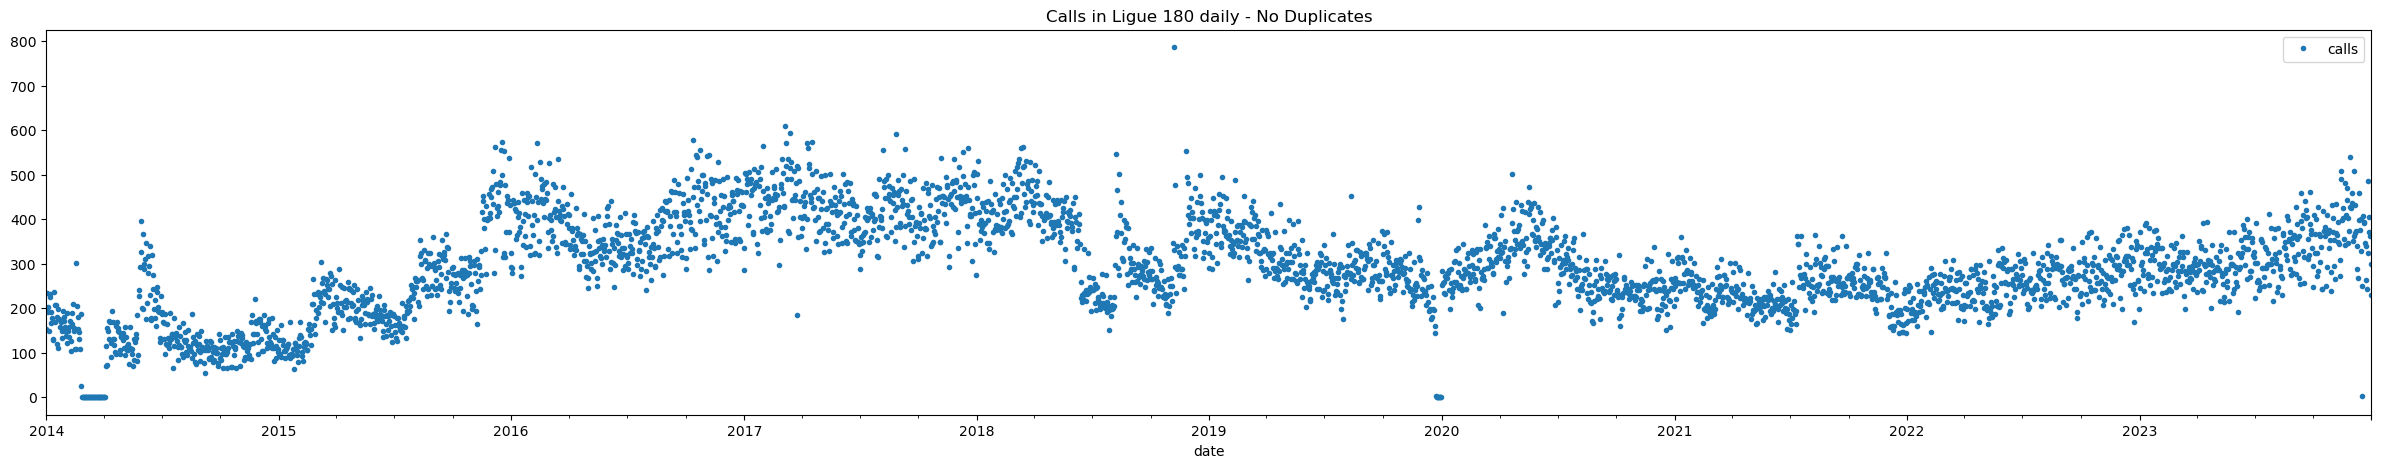

In [263]:
# Ersetzen der bereinigten Daten im Gesamtdatensatz
# Für df_hourly
df_hourly_filtered = df_hourly[df_hourly.index <= '2019-12-31 23:59:59']
df_hourly_nodupl = pd.concat([df_hourly_filtered, df_hourly_nodupl_2020])
# Für df_daily
df_daily_filtered = df_daily[df_daily.index <= '2019-12-31 23:59:59']
df_daily_nodupl = pd.concat([df_daily_filtered, df_daily_nodupl_2020])
df_hourly_nodupl.plot(style='.', figsize=(30,5), title='Calls in Ligue 180 hourly - No Duplicates - No daily values')
plt.show()
df_daily_nodupl.plot(style='.', figsize=(30,5), title='Calls in Ligue 180 daily - No Duplicates')
plt.show()

C:\Users\ChiaraVogt\AppData\Local\Temp\ipykernel_7716\3306585740.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  missing_days_per_month = missing_days_series.resample('M').sum().sort_index()


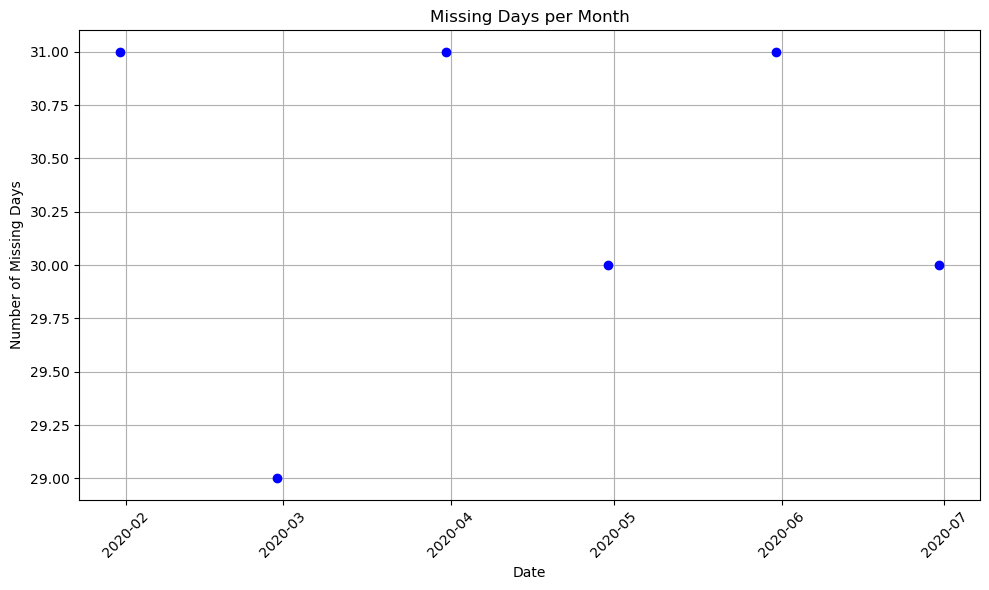

2020-01-31    31
2020-02-29    29
2020-03-31    31
2020-04-30    30
2020-05-31    31
2020-06-30    30
Freq: ME, dtype: int64


In [260]:
def missing_days_per_month_continuous(df_cleaned):
    # Sicherstellen, dass der Index als datetime formatiert ist
    df_cleaned.index = pd.to_datetime(df_cleaned.index)

    # Liste aller Tage im Zeitraum des DataFrames erstellen
    start_date = df_cleaned.index.min().normalize()
    end_date = df_cleaned.index.max().normalize()
    all_days = pd.date_range(start=start_date, end=end_date, freq='D')

    # Liste der Tage, die im bereinigten DataFrame fehlen erstellen
    cleaned_days = df_cleaned.index.normalize().unique()
    missing_days = set(all_days) - set(cleaned_days)

    # Neuer DataFrame mit der Anzahl der fehlenden Tage pro Monat
    missing_days_series = pd.Series(1, index=pd.to_datetime(list(missing_days)))
    missing_days_per_month = missing_days_series.resample('M').sum().sort_index()

    # Plot mit einer durchgehenden Zeitachse erstellen
    plt.figure(figsize=(10,6))
    plt.plot(missing_days_per_month.index, missing_days_per_month, marker='o', linestyle='', color='blue')
    plt.title('Missing Days per Month')
    plt.xlabel('Date')
    plt.ylabel('Number of Missing Days')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return missing_days_per_month

missing_days_summary = missing_days_per_month_continuous(df_hourly_nodupl)
print(missing_days_summary)

In [261]:
data_call_all.to_csv('data_call_all.csv', index=True)
df_daily_nodupl.to_csv('df_daily.csv', index=True)
df_hourly_nodupl.to_csv('df_hourly.csv', index=True)
df_daily_nodupl_2020.to_csv('df_daily_2020.csv', index=True)
df_hourly_nodupl_2020.to_csv('df_hourly_2020.csv', index=True)

## Freie Tage nach Region filtern

In [ ]:
#TODO